# INF391 - Tarea 5

Utilizar Mean-shift para segmentar 3 imágenes a elección. Analizar cómo influye la variedad de colores y formas en la segmentación.

In [0]:
import numpy as np    
import cv2    
from sklearn.cluster import MeanShift, estimate_bandwidth

In [0]:
#Loading original image
originImg = cv2.imread('car.png')

# Shape of original image    
originShape = originImg.shape

# Converting image into array of dimension [nb of pixels in originImage, 3]
# based on r g b intensities    
flatImg = np.reshape(originImg, [-1, 3])

In [0]:
# Estimate bandwidth for meanshift algorithm    
# b = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)

ms = MeanShift(bandwidth = 30, bin_seeding=True)

# Performing meanshift on flatImg    
ms.fit(flatImg)

MeanShift(bandwidth=30, bin_seeding=True, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [0]:
# (r,g,b) vectors corresponding to the different clusters after meanshift    
labels = ms.labels_

# Remaining colors after meanshift    
cluster_centers = ms.cluster_centers_    

# Finding and diplaying the number of clusters    
labels_unique = np.unique(labels)    
n_clusters_ = len(labels_unique)    
print("Number of estimated clusters : %d" % n_clusters_)    

number of estimated clusters : 4


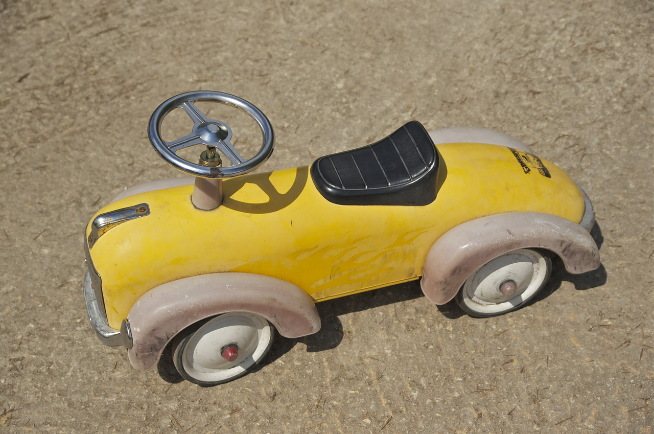

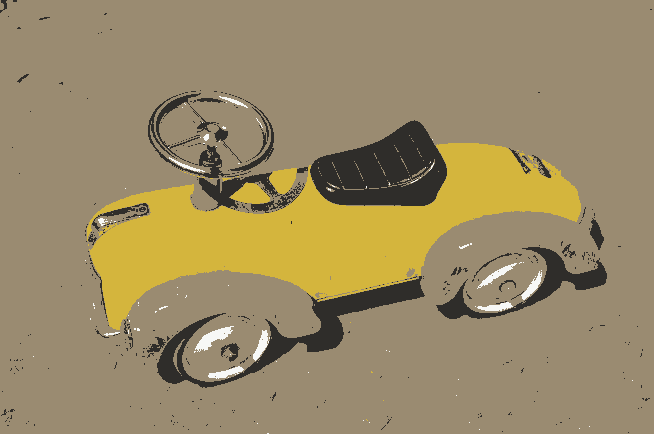

In [0]:
# Displaying segmented image    
segmentedImg = cluster_centers[np.reshape(labels, originShape[:2])]

# If You Are in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(originImg) 
cv2_imshow(segmentedImg)    
# Else
#cv2.imshow('Original',originImg)  
#cv2.imshow('Segmented',segmentedImg)  
# cv2.waitKey(1000)
# cv2.destroyAllWindows()
# MacOS: cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)